In [45]:
import numpy as np
#import pandas as pd # Data Frames not (yet) useful for this project.
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import csv

#import keras
import sklearn as sk

In [2]:
# # Create a test and training set, once.
# # LATER ON: USE scikitlearn's "split data" functions!
# import random

# with open('training_data.txt') as f:
#     headerline = f.readline()
#     points = f.readlines()
# f.close()

# N = len(points)
# N_train = int(N * 0.8)
# print(N, N_train)

# random.seed(888)
# random.shuffle(points) # Shuffles iterable in place

# with open('data_train.txt', 'w') as TRAIN:
#     TRAIN.write(headerline)
#     for i in range(0, N_train):
#         TRAIN.write(points[i])
# TRAIN.close()

# with open('data_test.txt', 'w') as TEST:
#     TEST.write(headerline)
#     for i in range(N_train, N):
#         TEST.write(points[i])
# TEST.close()

# data_labeled = np.loadtxt('./training_data.txt', skiprows=1) #pd.read_csv('./training_data.txt')
# print(data_labeled.shape)

# with open('training_data.txt') as f:
#     headerline = f.readline()
# f.close()
    
# # N, D1 = data_labeled.shape

# # np.random.seed(888)
# # # np.random.shuffle only shuffles along first dimension, as we desired.
# # data_labeled_shuffle = np.random.shuffle(data_labeled)

# # N_train = int(N * 0.8)

# # data_train = data_labeled[0:N_train, :]
# # data_test = data_labeled[N_train:, :]

# # print(data_train.shape)
# # print(data_test.shape)

# # np.savetxt('data_train.txt', data_train, delimiter=' ', header=headerline)
# # np.savetxt('data_test.txt', data_test, delimiter=' ', header=headerline)

In [3]:
data_train = np.loadtxt('./data_train.txt', skiprows=1)
data_test = np.loadtxt('./data_test.txt', skiprows=1)

In [58]:
Y = data_train[:, 0]
X = data_train[:, 1:]

Y_test = data_test[:, 0]
X_test = data_test[:, 1:]

print(Y.shape)
print(X.shape)

N, D = X.shape

with open('training_data.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    labels = next(reader)
labels = labels[1:]

(16000,)
(16000, 1000)


In [32]:
# Following the example code here:
#http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
from sklearn import decomposition

pca_unnorm = decomposition.PCA(n_components=5)
pca_unnorm.fit(X)
X_pca_unnorm = pca_unnorm.transform(X)

In [33]:
print(X_pca_unnorm.shape)
X_pca_unnorm[0:5, 0:5]

(16000, 5)


array([[-1.98151054, -0.99555394, -0.04558799,  0.21683218, -0.46736732],
       [ 0.335567  , -0.50823199, -0.80540147,  0.12664069, -0.14278082],
       [-1.11568807, -0.12112951, -0.41951128,  0.11356485,  0.42000582],
       [-2.01971228, -0.92933723, -0.06369464,  0.08513448, -0.10884682],
       [-1.43936968, -0.44883516, -0.50199689,  0.05953319, -0.79164976]])

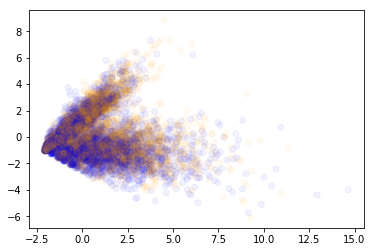

In [53]:
comp1 = 0
comp2 = 1

palette = ['orange', 'blue']
plt.scatter(X_pca_unnorm[:, comp1], X_pca_unnorm[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
plt.show()

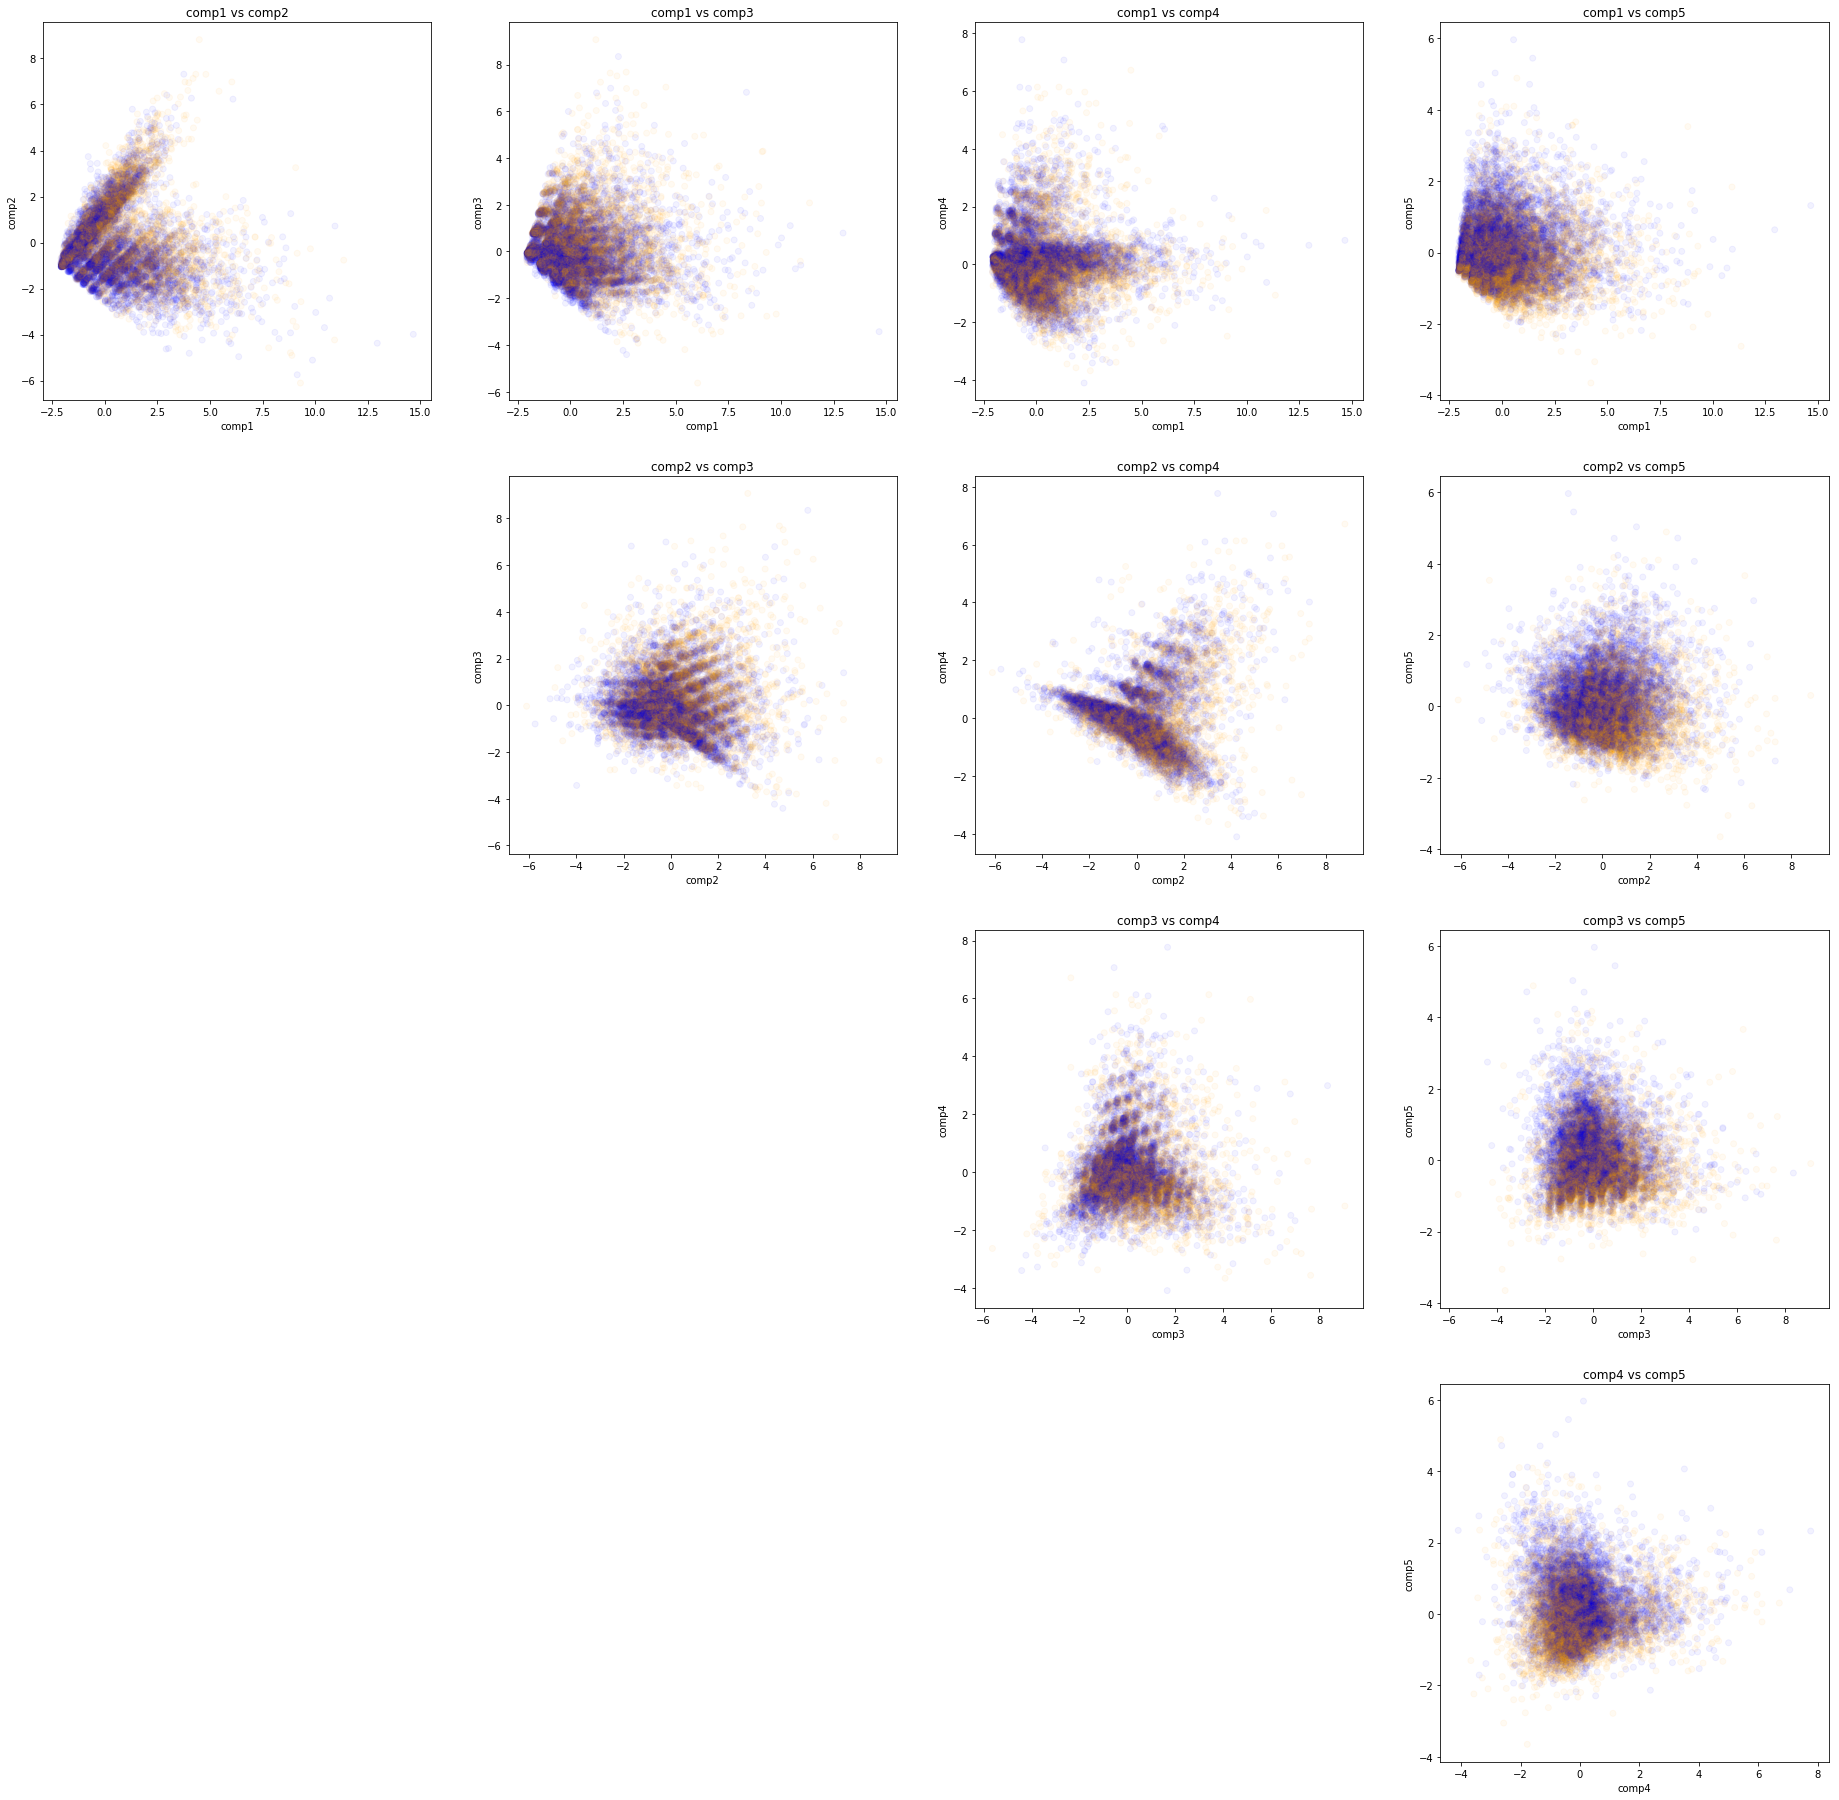

In [78]:
plt.figure(figsize=(32,32))

palette = ['orange', 'blue']

for comp1 in range(ncomp-1):
    for comp2 in range(comp1+1, ncomp):
        plt.subplot(ncomp-1, ncomp-1, (ncomp-1)*comp1+comp2)
        plt.scatter(X_pca_unnorm[:, comp1], X_pca_unnorm[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
        plt.title('comp{0} vs comp{1}'.format(comp1+1, comp2+1))
        plt.xlabel('comp{0}'.format(comp1+1))
        plt.ylabel('comp{0}'.format(comp2+1))
plt.show()

In [43]:
wordsums = np.sum(X, axis=0)

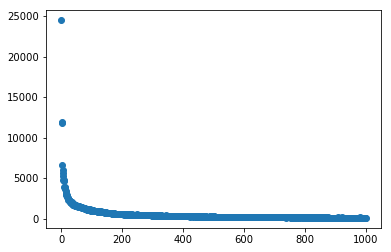

In [46]:
plt.scatter(range(1000), wordsums)

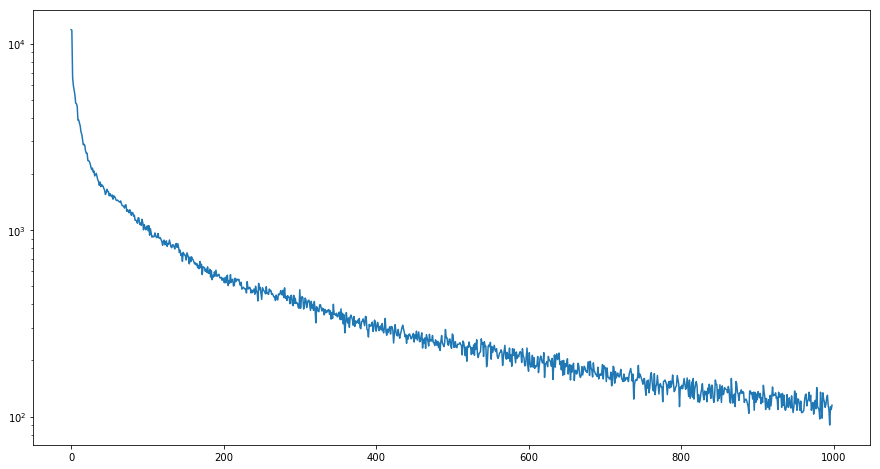

In [65]:
plt.figure(figsize=(15, 8))
plt.semilogy(range(1000-1), wordsums[1:])

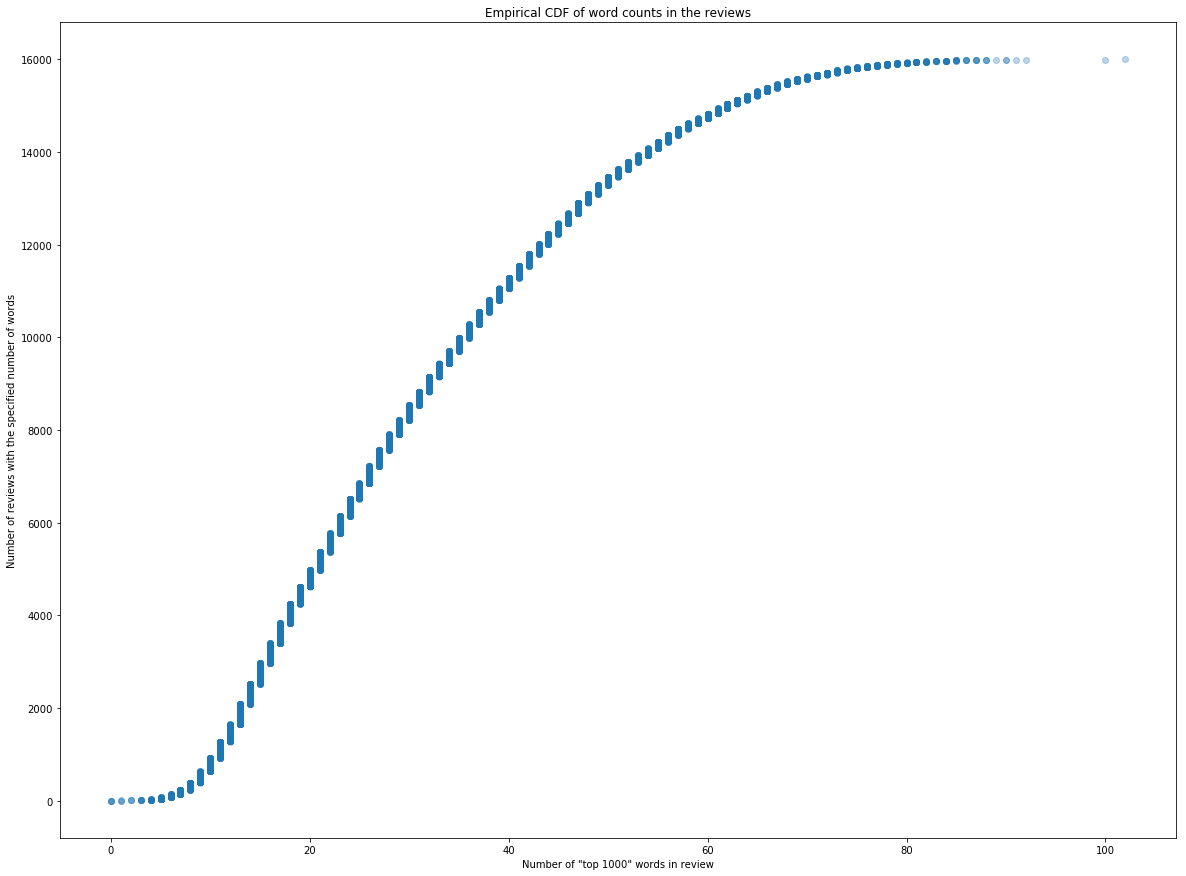

In [63]:
points_nwords = np.sum(X, axis=1)
plt.figure(figsize=(20, 15))
plt.scatter(sorted(points_nwords), range(N), alpha=0.3)
plt.title('Empirical CDF of word counts in the reviews')
plt.xlabel('Number of "top 1000" words in review')
plt.ylabel('Number of reviews with the specified number of words')
plt.show()

In [60]:
# See the plot of which words appear the most (wordsums)

X_stand = X / wordsums

In [69]:
ncomp = 5
pca_stand = decomposition.PCA(n_components=ncomp)
pca_stand.fit(X_stand)
X_pca_stand = pca_stand.transform(X_stand)

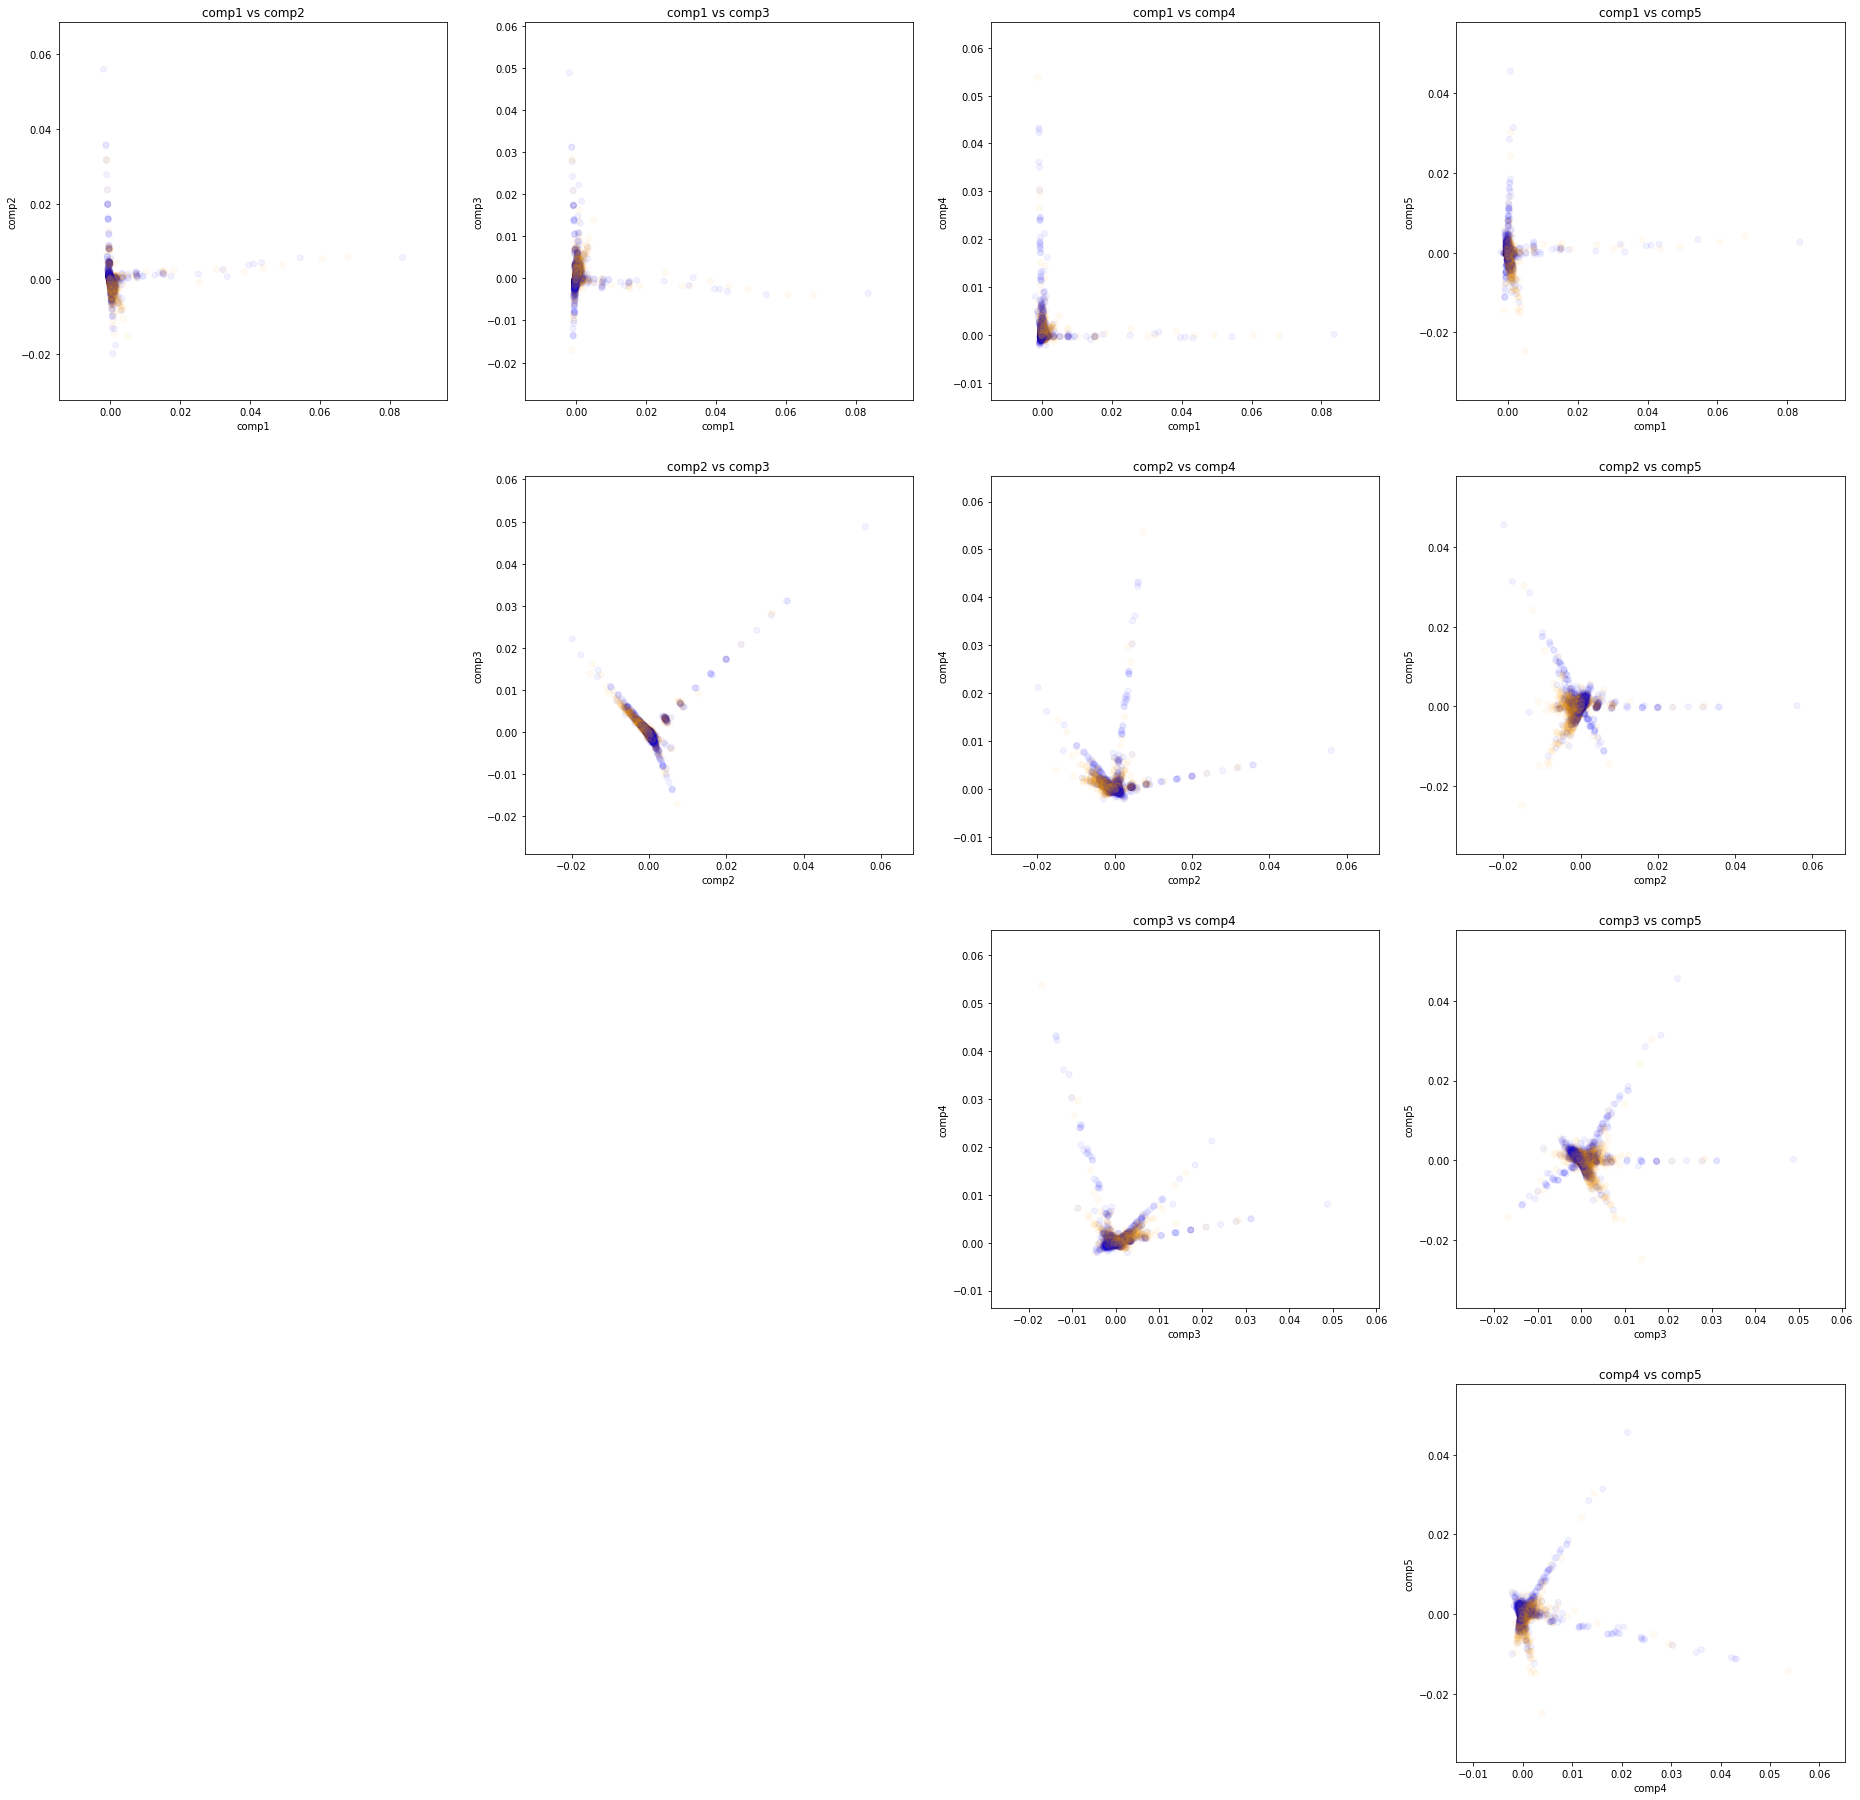

In [77]:
plt.figure(figsize=(32,32))

palette = ['orange', 'blue']

for comp1 in range(ncomp-1):
    for comp2 in range(comp1+1, ncomp):
        plt.subplot(ncomp-1, ncomp-1, (ncomp-1)*comp1+comp2)
        plt.scatter(X_pca_stand[:, comp1], X_pca_stand[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
        plt.title('comp{0} vs comp{1}'.format(comp1+1, comp2+1))
        plt.xlabel('comp{0}'.format(comp1+1))
        plt.ylabel('comp{0}'.format(comp2+1))
plt.show()

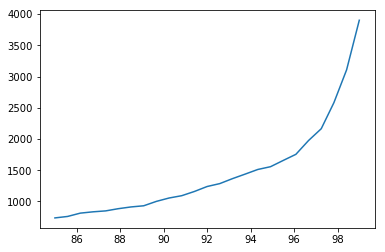

In [94]:
# I'm going to try logistic regression with the numerous words taken out, no normalization,
# and L1 regularization
from sklearn.linear_model import LogisticRegression

npercentiles = 25
percentiles = np.linspace(85, 99, npercentiles)
wordPercentiles = np.zeros(npercentiles)
for i, p in enumerate(percentiles):
    wordPercentiles[i] = np.percentile(wordsums, p)

plt.plot(percentiles, wordPercentiles)

In [95]:
commonCutoff = np.percentile(wordsums, 97)
print(commonCutoff)
commonWords = wordsums >= commonCutoff
print(sum(commonWords))
X_noCommon = X[:, np.logical_not(commonWords)]
print(X_noCommon.shape)

2073.2
30
(16000, 970)


In [98]:
Cs = [10**(i) for i in range(-9, 9)] # C must be > 0.

my_logistics = []
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, Y)
    my_logistics.append(model)

In [99]:
E_valids = []
for model in my_logistics:
    pred = model.predict(X_test)
    E_valid = np.sum(np.logical_not(np.equal(Y_test, pred)))
    E_valids.append(E_valid)

In [105]:
E_valids = np.array(E_valids)
1 - (E_valids / len(Y_test))

array([ 0.49   ,  0.49   ,  0.49   ,  0.49   ,  0.49   ,  0.49   ,
        0.59425,  0.7825 ,  0.8365 ,  0.83925,  0.83875,  0.83775,
        0.83775,  0.83775,  0.83775,  0.83775,  0.83775,  0.83775])

In [113]:
Cs = np.linspace(0.2, 1.2, 50) # C must be > 0.

my_logistics = []
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, Y)
    my_logistics.append(model)

In [114]:
E_valids = []
for model in my_logistics:
    pred = model.predict(X_test)
    E_valid = np.sum(np.logical_not(np.equal(Y_test, pred)))
    E_valids.append(E_valid)
E_valids = np.array(E_valids)
accuracy = 1 - (E_valids / len(Y_test))

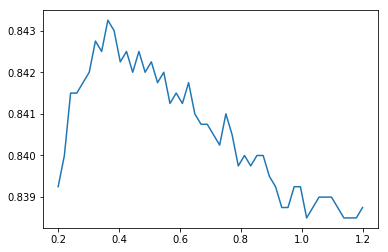

In [115]:
plt.plot(Cs, accuracy)

In [117]:
print(np.argmax(accuracy))
print(Cs[np.argmax(accuracy)])

8
0.363265306122
